In [1]:
import torch 
import torch.nn as nn 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("datasets/mushrooms.csv")

In [3]:
from sklearn.preprocessing import LabelEncoder

for item in df.columns:
    df[item] = LabelEncoder().fit_transform(df[item])
df.head(n=5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [4]:
from sklearn.model_selection import train_test_split

X, y = df.drop(["class"], axis = 1), df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train = torch.from_numpy(np.array(X_train)).float()
X_test = torch.from_numpy(np.array(X_test)).float()

y_train = torch.from_numpy(np.array(y_train)).long()
y_test = torch.from_numpy(np.array(y_test)).long()

print(X_train.size(), y_train.size())

torch.Size([6499, 22]) torch.Size([6499])


In [5]:
y_train

tensor([1, 1, 1,  ..., 0, 1, 0])

In [37]:
class MushroomClassifier(nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MushroomClassifier, self).__init__()

        self.linear_1 = nn.Linear(input_dim, hidden_dim)
        self.sig_1 = nn.Sigmoid()

        self.linear_2 = nn.Linear(hidden_dim, output_dim)
        self.sig_2 = nn.Sigmoid()
    
    def forward(self, x):
        output = self.sig_1(self.linear_1(x))
        output = self.sig_2(self.linear_2(output))
        return output

n_classes = len(np.unique(df["class"]))
n_samples, n_features = X_train.shape
model = MushroomClassifier(input_dim = n_features, hidden_dim = 1000, output_dim = 2)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.2)
criterion = torch.nn.CrossEntropyLoss()

In [38]:
print(model)

MushroomClassifier(
  (linear_1): Linear(in_features=22, out_features=1000, bias=True)
  (sig_1): Sigmoid()
  (linear_2): Linear(in_features=1000, out_features=2, bias=True)
  (sig_2): Sigmoid()
)


In [39]:
import tqdm 

n_epochs = 100

loss_list = torch.zeros((n_epochs, ))
accuracy_list = torch.zeros((n_epochs))

for epoch in tqdm.trange(n_epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss_list[epoch] = loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_guess = model(X_test)
        correct = (torch.argmax(y_guess, dim = 1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 12.45it/s]


In [40]:
accuracy_list

tensor([0.7145, 0.7046, 0.7157, 0.7348, 0.7711, 0.7791, 0.8055, 0.7902, 0.8043,
        0.7852, 0.7914, 0.7662, 0.7428, 0.7206, 0.6622, 0.7065, 0.6597, 0.7188,
        0.6837, 0.7243, 0.7194, 0.7397, 0.7452, 0.7680, 0.7742, 0.7871, 0.7951,
        0.8068, 0.8062, 0.8178, 0.8148, 0.8215, 0.8166, 0.8185, 0.8215, 0.8185,
        0.8222, 0.8203, 0.8215, 0.8215, 0.8228, 0.8228, 0.8252, 0.8252, 0.8258,
        0.8265, 0.8283, 0.8295, 0.8308, 0.8326, 0.8332, 0.8338, 0.8345, 0.8351,
        0.8363, 0.8375, 0.8382, 0.8388, 0.8388, 0.8394, 0.8400, 0.8406, 0.8412,
        0.8418, 0.8425, 0.8425, 0.8425, 0.8425, 0.8437, 0.8437, 0.8437, 0.8443,
        0.8449, 0.8462, 0.8468, 0.8468, 0.8474, 0.8480, 0.8486, 0.8486, 0.8492,
        0.8498, 0.8511, 0.8517, 0.8517, 0.8517, 0.8523, 0.8523, 0.8529, 0.8548,
        0.8554, 0.8554, 0.8560, 0.8560, 0.8560, 0.8566, 0.8566, 0.8566, 0.8566,
        0.8566])

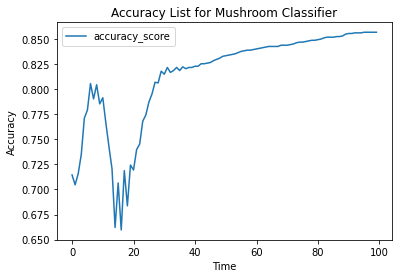

In [41]:
import matplotlib.pyplot as plt 

plt.plot(accuracy_list, label = "accuracy_score")
plt.title("Accuracy List for Mushroom Classifier")
plt.xlabel("Time")
plt.ylabel("Accuracy")
plt.legend()